- Date: Thursday 12 February 2022
- People: Anatoly Krasnikh, Alex Halavanau, Agustin Romero
- Location: SLAC Linac 21-9

Commercial pulser. 30.6 dB red-color load, 26 dB blue-color load, then 26 dB yellow-color load. The repetition rate of the pulser was 120 Hz.

![](1.png)


Compute the translation from voltage at the scope to voltage at the structure.

$\textrm{dBv}=20\log_{10}\frac{V_{\textrm{out}}}{V_{\textrm{in}}}=82.6$

We roughly measured loss from each long cable to be about 0.5 kV.

$V_\textrm{structure}=13335.2V_\textrm{scope}-0.5\ \textrm{kV}$

In [1]:
def vstructure(vscope):
    return 13335.2*vscope - 0.5

Test using cables 1 and 2 from the tunnel to the klystron gallery.

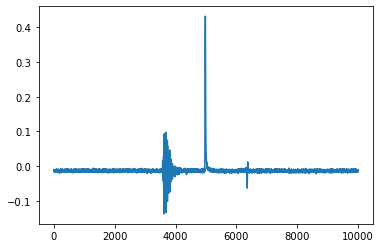

In [2]:
import numpy
import matplotlib.pyplot as pyplot
import h5py
import matplotlib
data = numpy.loadtxt('1to2-8kv.txt')
pyplot.plot(data[:,1]);

We noticed the two pulses before and after. We assumed they came from the trigger.

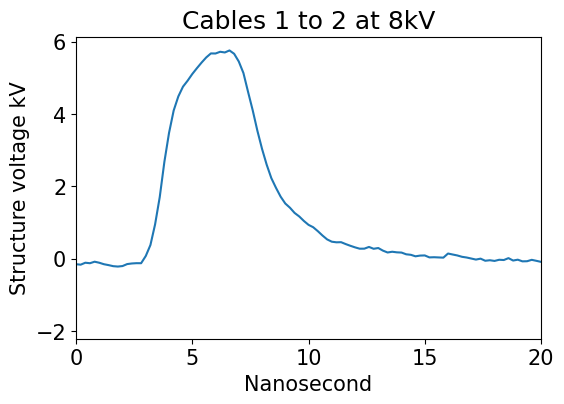

In [3]:
trigger_delay_ns = 370
x = data[:,0] * 1E9 - trigger_delay_ns
y = vstructure(data[:,1]) / 1000
matplotlib.rcParams.update({'font.size': 15})
figure, ax = pyplot.subplots(dpi=100)
ax.set_xlim(0, 20)
ax.plot(x, y)
ax.set_title('Cables 1 to 2 at 8kV')
ax.set_xlabel('Nanosecond');
ax.set_ylabel('Structure voltage kV');

Then, unplug and plug in cables 3 and 4. Turn on commerical pulser.

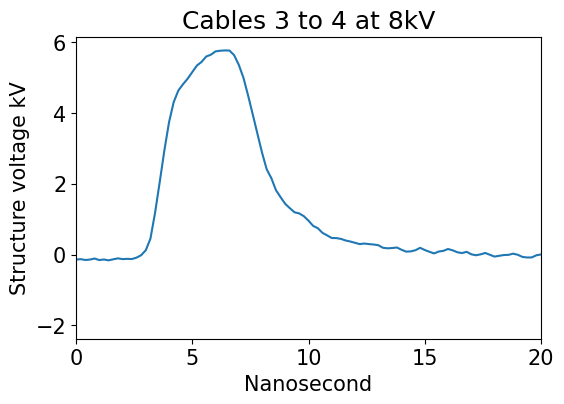

In [4]:
data = numpy.loadtxt('3to4-8kV.txt')
trigger_delay_ns = 370
x = data[:,0] * 1E9 - trigger_delay_ns
y = vstructure(data[:,1]) / 1000
figure, ax = pyplot.subplots(dpi=100)
ax.set_xlim(0, 20)
ax.plot(x, y)
ax.set_title('Cables 3 to 4 at 8kV')
ax.set_xlabel('Nanosecond');
ax.set_ylabel('Structure voltage kV');

Found a problem while turning on the pulser in the gallery, through the kicker, then back to the gallery. The kicker sometimes doesn't respond at all around 3.0 kV. The pulse disappears or drops in amplitude.

![](4.png)

Removed the cable, screwed it back in using wrench.

![](2.png)

With that fixed, move on to cables 5 and 6.

'Cables 5 and 6, 8kV'

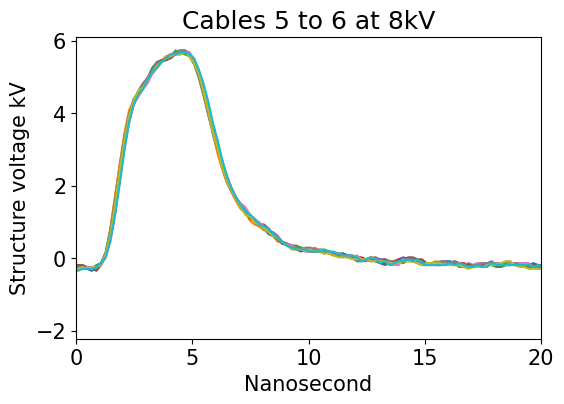

In [5]:
file = '2022-01-12-17-47-36'
f = h5py.File(file, 'r')
figure, ax = pyplot.subplots(dpi=100)
ax.set_xlim(0, 20)
pyplot.title('Cables 5 to 6 at 8kV')
pyplot.xlabel('Nanosecond');
pyplot.ylabel('Structure voltage kV');

for index in range(10):
    x = f['awgscope_traces_x_CH1'][index] - trigger_delay_ns
    y = vstructure(f['awgscope_traces_y_CH1'][index]) / 1000
    
    ax.plot(x, y)

f.attrs['comment']

Finally, cables 7 to 8, 8 kV

'Cables 7 to 8, 8 kV'

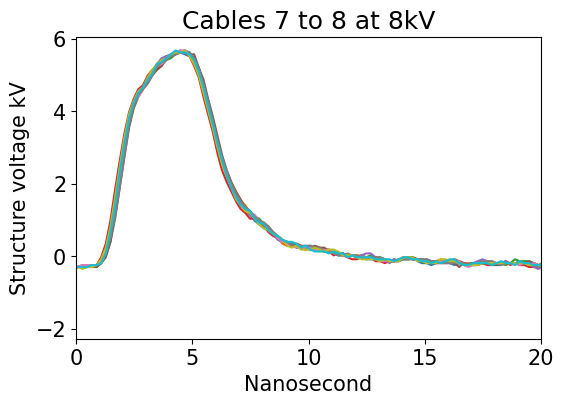

In [6]:
file = '2022-01-12-17-51-14'
f = h5py.File(file, 'r')
figure, ax = pyplot.subplots(dpi=100)
ax.set_xlim(0, 20)
pyplot.title('Cables 7 to 8 at 8kV')
pyplot.xlabel('Nanosecond');
pyplot.ylabel('Structure voltage kV');

for index in range(10):
    x = f['awgscope_traces_x_CH1'][index] - trigger_delay_ns
    y = vstructure(f['awgscope_traces_y_CH1'][index]) / 1000
    
    ax.plot(x, y)

f.attrs['comment']

## Conclusion

We computed the voltage at the structure as function of time. The rise time is within 2.5 nanoseconds for all measurements.

![](5.png)


The analysis of the peak voltage should be checked by others. The pulses from pulser through the structure to the load should be compared with the pulses from the pulser straight to the load. Specifically, the rise time of both circuits should be compared. The time jitter of the pulses should be compared.

Some problems were encountered. The structures cables was imperfectly attached and had to be wrenched in with much effort. There was possibly some arcing near the structure which caused the drops in signal.

Not sure what this photo is. Looks good though.

![](3.png)